In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
import math

In [2]:
def show_image(image, title="sample", figsize=(8,6), tickoff=False):
  plt.figure(figsize=figsize)
  if image.ndim == 2:
      plt.imshow(image, cmap="gray", norm=NoNorm())
  else:
      plt.imshow(image)
  plt.title(title)
  plt.show()

def show_double_image(image1,image2, title="Sample",figsize=(8,6)):
  fig, (ax1, ax2) = plt.subplots(1, 2,figsize=figsize)
  fig.suptitle(title)
  ax1.imshow(image1,cmap="gray", norm=NoNorm())
  ax2.imshow(image2,cmap="gray", norm=NoNorm())

In [3]:
# using the same trick as in the previous example
def return_contour(img):
    # convert to gray scale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # apply threshold
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    # show_image(thresh)
    # find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # sort contours
    # contours = sorted(contours, key=cv2.contourArea, reverse=True)
    return thresh,contours
    

def get_number_by_countour(thres,contours):
    # show every digit
    result = []
    for cnt in contours[::-1]:
        x, y, w, h = cv2.boundingRect(cnt)
        digit = thres[y:y + h, x:x + w]
        result.append(digit)
    return result
        
    # for cnt in co
    # x, y, w, h = cv2.boundingRect(contour)
    # digit = thres[y:y + h, x:x + w]
    # return digit

[  0 232 353 661 782]
[  0  35  66  94 122 150 178 206 234 262 290 318 346 374 402 430 458]


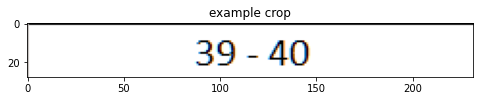

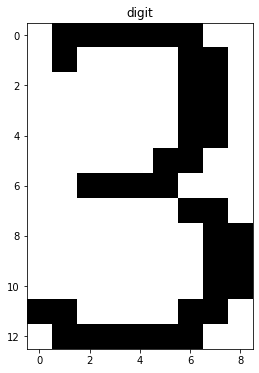

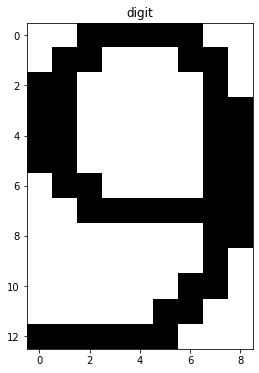

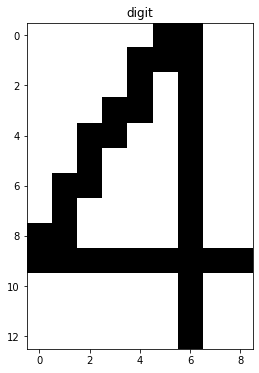

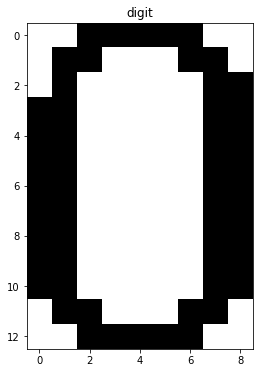

In [9]:
origin =cv2.imread('./images/bangdiem.png', cv2.IMREAD_COLOR)
grayed = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
# grayed =rgb2gray(highlighted_image)
# configure mask
grayed[grayed <= 250] = 1
grayed[grayed > 250] = 0
# show_image(grayed, "gray")


sum_col = np.sum(grayed, axis=0)
sum_row = np.sum(grayed, axis=1)
# cot thi phan loai hoi kho
col_index = np.where(sum_col > 0.92 * sum_col.max())[0]
row_index = np.where(sum_row > 0.9 * sum_row.max())[0]
print(col_index)
print(row_index)
example_crop = origin[row_index[2]:row_index[3], col_index[0]:col_index[1]]
show_image(example_crop, "example crop")
result = return_contour(example_crop)
digits = get_number_by_countour(result[0], result[1])[1:-1:]
for i in digits:
    i[i <= 250] = 1
    i[i > 250] = 0
    show_image(i*255, "digit")    

TIME TO BRING THE BIG GUN 

In [ ]:
import pytesseract

def increase_tesseract(img):
      img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
      kernel = np.ones((1, 1), np.uint8)
      img = cv2.dilate(img, kernel, iterations=1)
      img = cv2.erode(img, kernel, iterations=1)
      img = cv2.threshold(cv2.GaussianBlur(img, (15, 15), 0), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
      img = cv2.threshold(cv2.bilateralFilter(img, 5, 75, 75), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
      img = cv2.threshold(cv2.medianBlur(img, 3), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
      img = cv2.adaptiveThreshold(cv2.GaussianBlur(img, (5, 5), 0), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)
      img = cv2.adaptiveThreshold(cv2.bilateralFilter(img, 9, 75, 75), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)
      img = cv2.adaptiveThreshold(cv2.medianBlur(img, 3), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)
      return img

for i in range(0,count):
    # Apply OCR on the cropped image
    aha = np.array(cv2.imread('./digits'+str(i)+'.jpg'))
    scale_percent = 900
    width = int(aha.shape[1] * scale_percent / 100)
    height = int(aha.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(aha, dim, interpolation = cv2.INTER_AREA)
    padsize = 40
    resized = np.pad(resized, pad_width=[(padsize, padsize),(padsize, padsize),(0, 0)], mode='constant', constant_values=[(255,255),(255,255),(255,255)])
    resized = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
    resized = increase_tesseract(resized)
    text = pytesseract.image_to_string(resized,config="--psm 6 digits")[0]
    print(text)
    show_image(resized, text)

